<a href="https://colab.research.google.com/github/KyoungmiKwon/trainingAtAiffel/blob/main/DL12_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Project`   
Boston house price, Reuters - text classifer, CIFAR10 - image classifer

# Boston House Price

## 데이터 로드 및 전처리

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_data[0,:]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean_train = train_data.mean(axis=0)
train_data -= mean_train

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std_train = train_data.std(axis=0)
train_data /= std_train

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean_train
test_data /= std_train

## 모델 구성 및 컴파일

In [ ]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))
# model.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow import keras

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    monitor='val_mse',
    mode='min',
    verbose=1,
    restore_best_weights=True)

In [ ]:
history_boston = model.fit(train_data, train_labels,
                           epochs=100,
                           batch_size=32,
                           validation_split=0.2,
                           verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 506.0144 - mae: 20.6377 - val_loss: 572.8196 - val_mae: 22.0944
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 444.7610 - mae: 19.2553 - val_loss: 527.6282 - val_mae: 21.0766
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 461.3061 - mae: 19.5267 - val_loss: 462.6038 - val_mae: 19.5550
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 376.7250 - mae: 17.3428 - val_loss: 374.5406 - val_mae: 17.3703
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 296.0807 - mae: 15.1678 - val_loss: 265.6316 - val_mae: 14.2084
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 192.6275 - mae: 11.9389 - val_loss: 152.5106 - val_mae: 10.0188
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 104.5763 - mae: 8.3108 - val_loss: 77.1239 - val_mae: 6.4892
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 58.4709 - mae: 5.8536 - val_loss: 54.4743 - val_mae: 5.4664
Epoch 9/100
11/

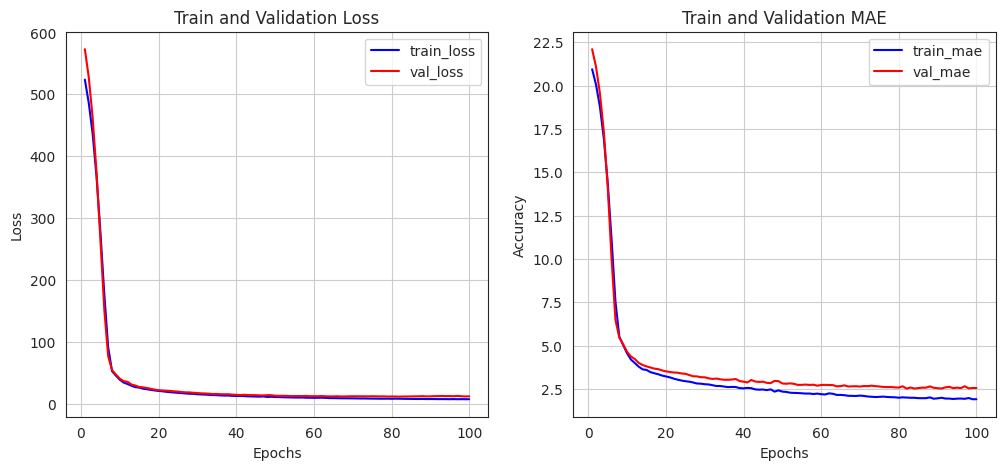

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

history_dict = history_boston.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [ ]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.9279 - mae: 2.7493


[22.99663543701172, 2.9542622566223145]

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred_ys = model.predict(test_data)
mae = mean_absolute_error(test_labels, pred_ys)
mse = mean_squared_error(test_labels, pred_ys)
rmse = np.sqrt(mse)
r2 = r2_score(test_labels, pred_ys)

print('MAE:', mae), print('MSE:', mse), print('RMSE:', rmse), print('R2:', r2)

"""
MAE: 2.832189294403675
MSE: 17.450991011508197
RMSE: 4.177438331263335
R2: 0.7903629959232679

MAE: 2.662835549373253
MSE: 14.20810636226021
RMSE: 3.7693641854111433
R2: 0.8293194438399767

"""

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
MAE: 2.9542622248331707
MSE: 22.996636646316503
RMSE: 4.795480856631221
R2: 0.7237437113344585


'\nMAE: 2.832189294403675\nMSE: 17.450991011508197\nRMSE: 4.177438331263335\nR2: 0.7903629959232679\n\nMAE: 2.662835549373253\nMSE: 14.20810636226021\nRMSE: 3.7693641854111433\nR2: 0.8293194438399767\n\n'

# Reuters

## 데이터 로드 및 전처리

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


In [ ]:
x_train.shape, y_train.shape

((6736,), (6736,))

In [ ]:
x_train[:1] # 단어 인덱스(Word Indices)의 시퀀스(Sequence) 형태

array([list([1, 978, 935, 311, 23, 408, 6, 433, 6, 19, 492, 11, 82, 2, 2669, 7, 89, 9, 19, 597, 11, 7, 448, 22, 19, 653, 11, 7, 48, 4, 978, 1262, 9, 2043, 80, 81, 8853, 8, 162, 5, 935, 2, 55, 75, 1184, 6, 433, 6, 1922, 18, 82, 2235, 2669, 7, 89, 22, 3811, 18, 7, 48, 9, 713, 2736, 6, 3780, 18, 7, 448, 4, 8853, 8, 7, 10, 4144, 5, 25, 8695, 303, 1262, 9, 2470, 1190, 16, 1748, 1603, 3040, 1004, 28, 228, 4, 48, 320, 5, 321, 32, 11, 2, 7, 286, 206, 161, 6362, 2, 23, 133, 6, 30, 3025, 97, 384, 408, 935, 398, 55, 2916, 95, 1845, 24, 266, 3282, 7, 4, 76, 286, 4454, 9, 1073, 33, 351, 4, 8853, 8, 4, 1359, 6362, 1549, 84, 9, 4, 408, 246, 122, 23, 133, 6, 1099, 69, 10, 2382, 499, 7, 286, 198, 9, 260, 951, 52, 29, 16, 8, 4, 408, 535, 45, 3830, 10, 3901, 7, 122, 411, 457, 581, 225, 29, 16, 8, 4, 1192, 13, 935, 162, 43, 10, 3315, 5, 311, 1127, 389, 4, 314, 43, 54, 29, 185, 16, 34, 228, 579, 20, 5, 135, 122, 7, 105, 16, 34, 644, 20, 4, 148, 7, 162, 5, 935, 43, 10, 1257, 5, 122, 40, 958, 85, 1912, 6, 4,

In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    # (문서수, 어휘 사전 크기) 형태의 0으로 채워진 행렬 생성
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        # 각 문서(시퀀스)에 대해, 포함된 단어의 인덱스에 해당하는 위치를 1로 설정
        for word_index in sequence:
            # word_index가 dim 범위 내에 있는지 확인
            # 지정한 10,000개를 넘어가는 단어들은 기본적으로 데이터 처리 과정에서 배제
            if word_index < dim:
                results[i, word_index] = 1.
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
"""
tf.keras.utils.to_categorical(
    y,               # 변환할 정수형 레이블 배열 (NumPy array 또는 Python list)
    num_classes=None, # 총 클래스(범주)의 개수
)
"""

from tensorflow.keras.utils import to_categorical
test_labels_oh= to_categorical(test_labels)
y_train_oh= to_categorical(y_train)
y_val_oh= to_categorical(y_val)

## 모델 구성 및 컴파일

In [ ]:
from os import name
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(10000,), name='input_layer'))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(46, activation='softmax', name='output_layer'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

## 모델 학습

In [ ]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('Reuters_best_model.keras',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train_oh,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val, y_val_oh),
                    callbacks=[check_point_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.3350 - loss: 3.0259 - val_accuracy: 0.6874 - val_loss: 2.6901
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7240 - loss: 1.2066 - val_accuracy: 0.7164 - val_loss: 2.0392
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.7942 - loss: 0.8821 - val_accuracy: 0.7493 - val_loss: 1.5548
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8461 - loss: 0.6552 - val_accuracy: 0.7845 - val_loss: 1.2326
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8708 - loss: 0.5541 - val_accuracy: 0.7894 - val_loss: 1.0769
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8995 - loss: 0.4358 - val_accuracy: 0.7934 - val_loss: 0.9722
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9138 - loss: 0.3632 - val_accuracy: 0.8014 - val_loss: 0.9514
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9249 - loss: 0.3019 - val_accuracy: 0.

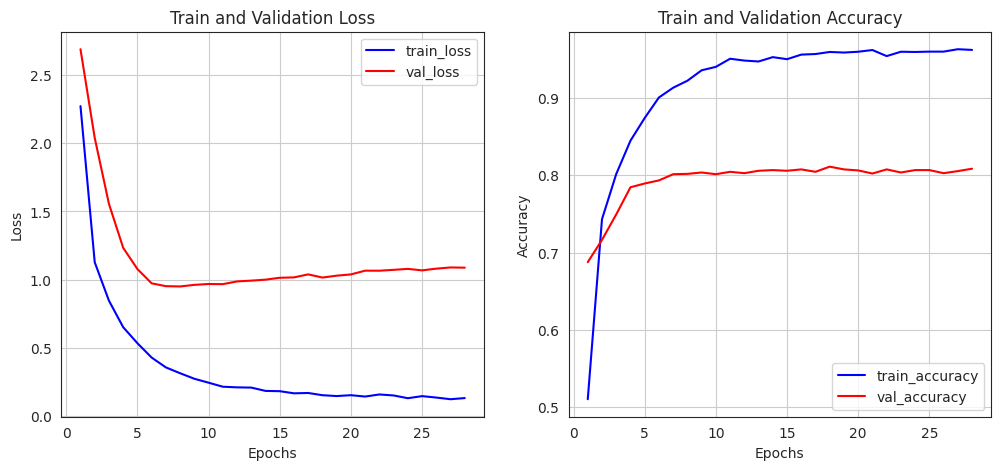

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [ ]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, test_labels_oh)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8212 - loss: 0.9772


[1.0208094120025635, 0.8058770895004272]

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report
import numpy as np

pred_ys = model.predict(x_test)

class_names = ['class_{}'.format(i) for i in range(46)]

print(classification_report(np.argmax(test_labels_oh, axis=1),
                            np.argmax(pred_ys, axis=1),
                            target_names=class_names,
                            zero_division='warn'))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

     class_0       0.89      0.67      0.76        12
     class_1       0.70      0.76      0.73       105
     class_2       0.70      0.80      0.74        20
     class_3       0.92      0.93      0.93       813
     class_4       0.86      0.86      0.86       474
     class_5       0.00      0.00      0.00         5
     class_6       0.80      0.86      0.83        14
     class_7       1.00      0.33      0.50         3
     class_8       0.62      0.68      0.65        38
     class_9       0.83      0.80      0.82        25
    class_10       0.93      0.87      0.90        30
    class_11       0.56      0.77      0.65        83
    class_12       0.62      0.38      0.48        13
    class_13       0.62      0.76      0.68        37
    class_14       0.17      0.50      0.25         2
    class_15       0.43      0.33      0.38         9
    class_16       0.69      0.75      0.7

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# CIFAR10

## 데이터 로드 및 전처리

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [31]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [16]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [33]:
num_classes = 10 # CIFAR-10은 10개 클래스 (0-9)
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

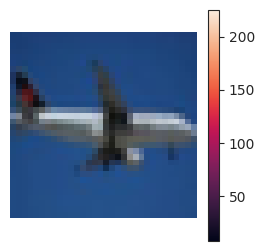

In [17]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')

plt.figure(figsize=(3,3))
plt.imshow(x_train[0])
plt.colorbar()
plt.axis('off')
plt.show()

In [18]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [19]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1,32,32,3)
x_val = x_val.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [20]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [37]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow import keras
from tensorflow.keras import models, layers

model=keras.models.Sequential()

model.add(layers.Input(shape=(32,32,3), name='input_layer'))
model.add(layers.Conv2D(32, (3,3), activation='relu')) # 16개의 필터를 사용하고, 커널 크기는 3x3
model.add(layers.MaxPool2D(2,2)) # 2x2 크기의 맥스 풀링 레이어 추가 # 입력 데이터 크기 절반으로 축
model.add(layers.Conv2D(32, (3,3), activation='celu'))
model.add(layers.MaxPooling2D((2,2))) # 입력 데이터 크기 절반으로 축소
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('celu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('celu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='celu'))
model.add(layers.Dense(10, activation='softmax', name='output_layer'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,786 (342.91 KB)

 Trainable params: 87,594 (342.16 KB)

 Non-trainable params: 192 (768.00 B)

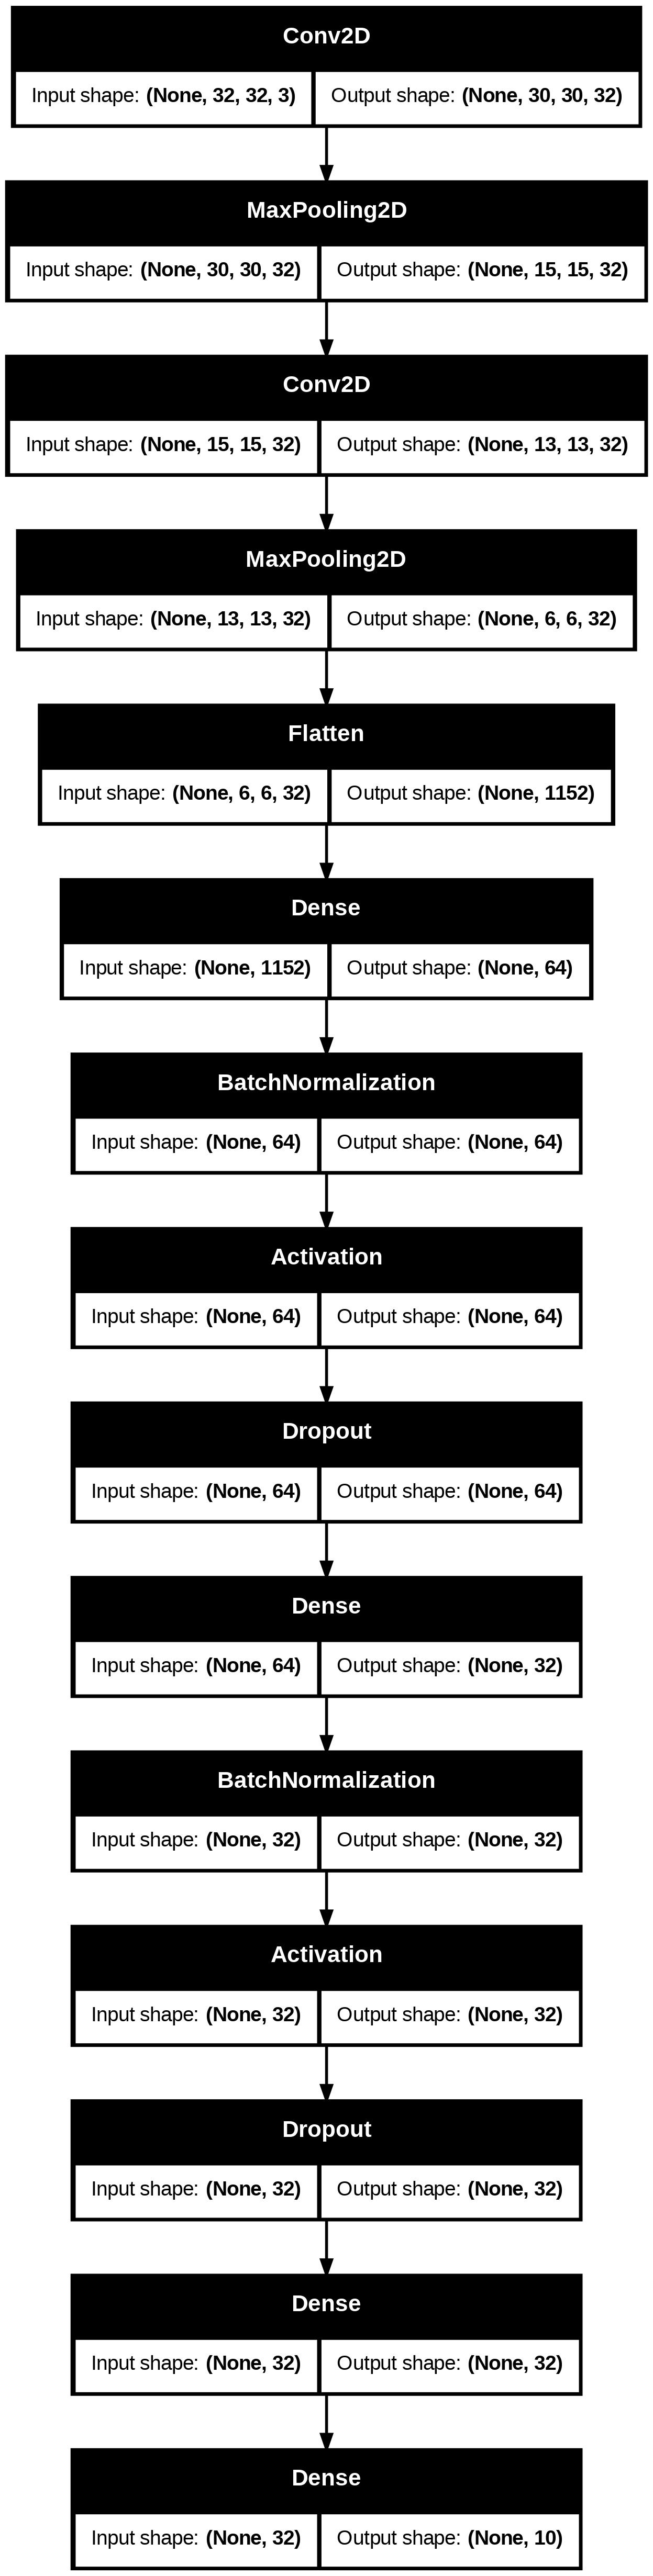

In [38]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

## 모델 학습

In [39]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks
from tensorflow.keras import models, layers

# Recreate the model before fitting
model=keras.models.Sequential()

model.add(layers.Input(shape=(32,32,3), name='input_layer'))
model.add(layers.Conv2D(32, (3,3), activation='relu')) # 16개의 필터를 사용하고, 커널 크기는 3x3
model.add(layers.MaxPool2D(2,2)) # 2x2 크기의 맥스 풀링 레이어 추가 # 입력 데이터 크기 절반으로 축
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2))) # 입력 데이터 크기 절반으로 축소
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax', name='output_layer'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


check_point_cb = callbacks.ModelCheckpoint('CIFAR10_best_model.keras',
                                           save_best_only=True)

early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # 모니터링할 지표 'loss', ('min','mse', 'mae', 'AUC', 'Precision', 'Recall', 'F1Score' 등)
                         # model.compile()에서 지정한 추가 지표를 사용할 경우 'val_'을 붙여야 함 -> 'val_mae', 'val_accuracy' 등
    verbose=1,           # 훈련 중에 조기 중단이 발생하면 메시지를 출력합니다.
    min_delta=0.001,     # 개선으로 간주되는 최소 변화량# min_delta는 개선으로 간주되는 최소 변화량입니다.
    patience=10,          # 5 에포크 동안 개선이 없으면 중단
    mode='min',          # val_loss는 최소화되는 것이 좋
    restore_best_weights=True # 가장 성능이 좋았던 에포크의 가중치로 복원
)


history3 = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=100,
          batch_size=128,
          callbacks=[check_point_cb, early_stopping_callback],
          )

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 132ms/step - accuracy: 0.2231 - loss: 2.1092 - val_accuracy: 0.4169 - val_loss: 1.5720
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.4258 - loss: 1.5598 - val_accuracy: 0.5288 - val_loss: 1.3166
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.4931 - loss: 1.3939 - val_accuracy: 0.5839 - val_loss: 1.1738
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.5382 - loss: 1.2844 - val_accuracy: 0.5682 - val_loss: 1.2295
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.5648 - loss: 1.2152 - val_accuracy: 0.6292 - val_loss: 1.0568
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 132ms/step - accuracy: 0.5857 - loss: 1.1723 - val_accuracy: 0.6280 - val_loss: 1.0481
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 126ms/step - accuracy: 0.6024 - loss: 1.1209 - val_accuracy: 0.6161 - val_loss: 1.0803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.6181 -

## 모델 평가 및 예측

In [40]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)
# [1.5413367748260498, 0.45820000767707825]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4137 - loss: 1.5793


[1.572047472000122, 0.41690000891685486]